In [2]:
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from hdbscan import HDBSCAN
from umap import UMAP


from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer

import pandas as pd
import re


In [3]:
df_p1 = pd.read_csv("transcripts/mrs-r.csv")
df_p1.drop(df_p1[(df_p1["Transcript"].str.startswith("Taylor: "))].index, inplace=True)
df_p1.shape

(64, 1)

In [13]:
# 1 paragraph -> 1 document
podcast1 = df_p1["Transcript"].to_list()
podcast1 = [re.sub("Mrs.? R: ", "", text) for text in podcast1]

docs = podcast1

# Prepare embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(docs, show_progress_bar=False) # 64, 384

# Dimensionality reduction
umap_model = UMAP(n_neighbors=12, n_components=5, metric="cosine", random_state=42, low_memory=False)
reduced_embeddings = umap_model.fit_transform(embeddings)
vectorizer = CountVectorizer(stop_words="english")
# ctfidf = ClassTfidfTransformer(reduce_frequent_words=True)

# Clustering
hdbscan_model = HDBSCAN(min_cluster_size=4, metric="euclidean", prediction_data=True)

# Create topic model
topic_model = BERTopic(umap_model=umap_model, 
                       hdbscan_model=hdbscan_model, 
                       # ctfidf_model=ctfidf,
                       vectorizer_model=vectorizer
                      )
topics, probs = topic_model.fit_transform(docs)

topic_model.get_topic_info()

,Topic,Count,Name
0,-1,19,-1_people_think_things_like
1,0,22,0_children_dont_family_things
2,1,10,1_dont_things_people_think
3,2,8,2_oh_good_fun_eat
4,3,5,3_jose_san_people_town


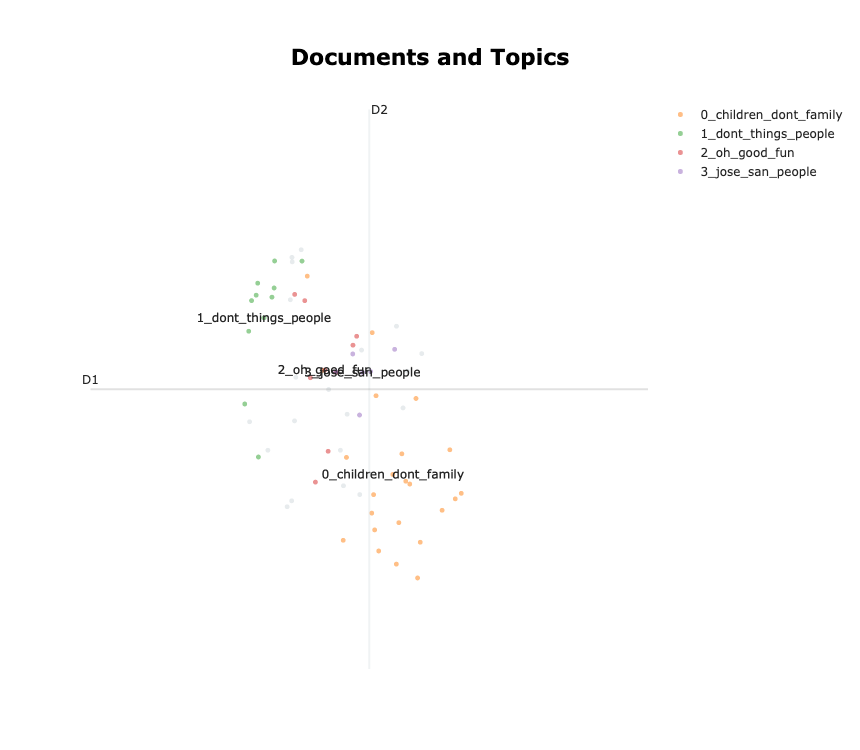

In [14]:
topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings)

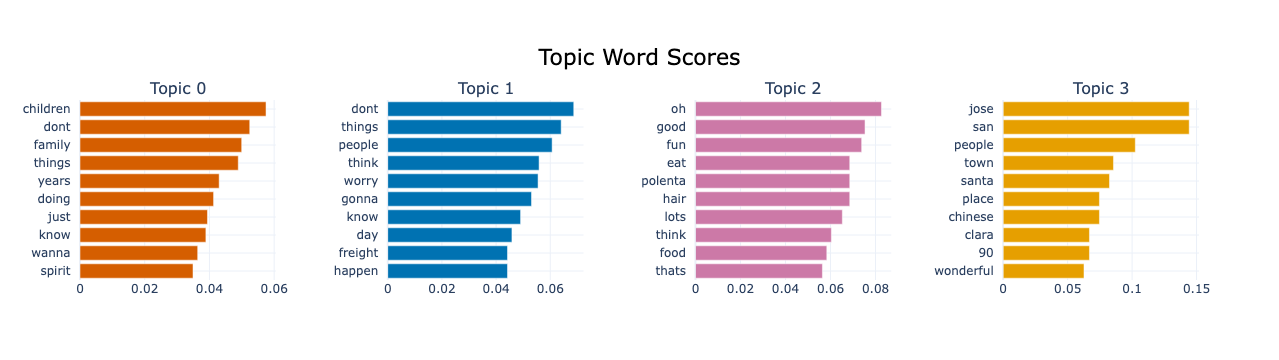

In [15]:
topic_model.visualize_barchart(n_words=10)

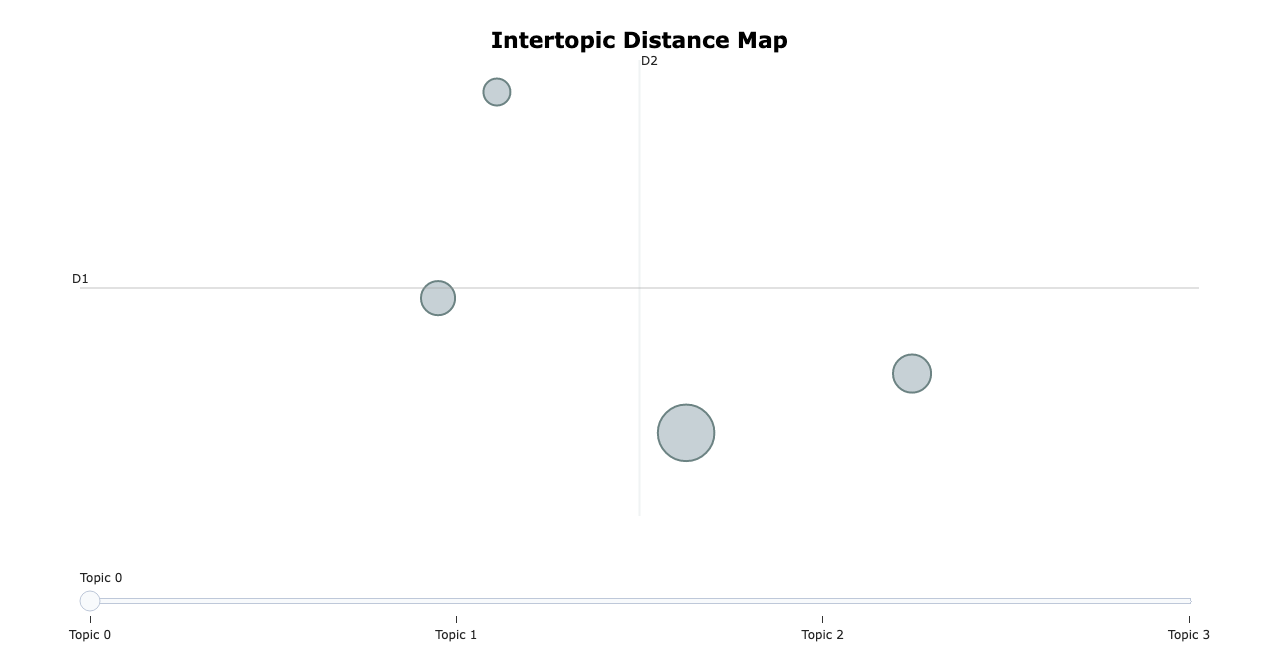

In [16]:
topic_model.visualize_topics()

In [ ]:
result = topic_model.get_document_info(docs)
result.drop(["Top_n_words", "Representative_document"], axis=1, inplace=True)
result


In [ ]:
docs[0]

In [ ]:
topic_model.get_topic_info(0)

In [ ]:
df_p2 = pd.read_csv("transcripts/mr-mao.csv")
podcast2 = df_p2["Transcript"].to_list()
podcast2 = [re.sub("Q: |Mr. Mao: ", "", text) for text in podcast2]